In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns

In [21]:
dir = r'../preprocessing-results'

df_p4 = pd.read_csv(dir + "/p2.csv")
df_p5 = pd.read_csv(dir + "/p3.csv")

df = pd.DataFrame()

df = df.append(df_p4)
df["max_zeros"] = df_p5["max_zeros"]
df

/tmp/ipykernel_559118/339816521.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_p4)


,index,sum_zeros,target,target_cat,max_zeros
0,0,140,0.0,1,140
1,1,135,0.0,1,91
2,2,140,0.0,1,140
3,3,140,0.0,1,140
4,4,137,0.0,1,101
...,...,...,...,...,...
98,98,137,0.0,1,82
99,99,89,9.0,0,17
100,100,139,0.0,1,124
101,101,87,10.0,0,9


In [22]:
# Create function to work out optimum number of clusters (Elbow Method)

def optimise_kmeans(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
    
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    # Generate the elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.title("Método elbow - E2")
    plt.xlabel("Número de clusters (k)")
    plt.ylabel("Inércias")
    plt.grid(True)
    plt.savefig("results/e2_elbow.png")
    plt.show()

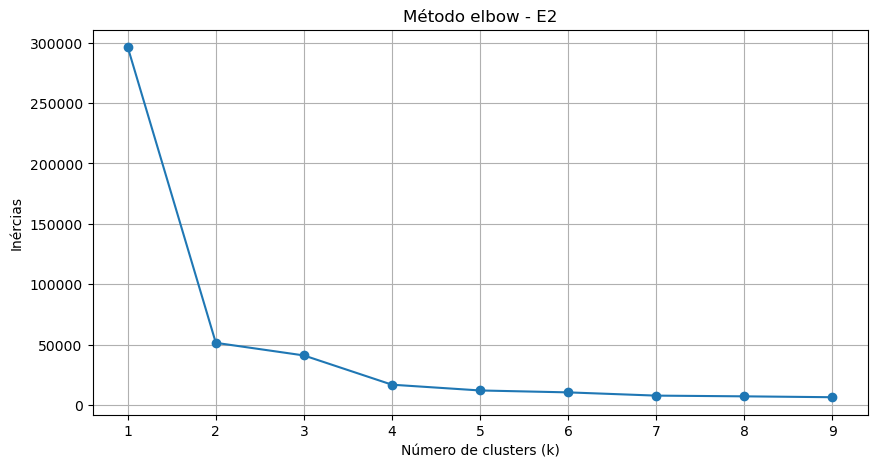

In [23]:
# Number of clusters

optimise_kmeans(df[["sum_zeros", "max_zeros"]], 10)

In [24]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df[["sum_zeros", "max_zeros"]])
centroids = kmeans.cluster_centers_
centroids

array([[137.7254902 , 114.92156863],
       [ 96.73076923,  26.44230769]])

In [25]:
df["kmeans"] = kmeans.labels_
df

,index,sum_zeros,target,target_cat,max_zeros,kmeans
0,0,140,0.0,1,140,0
1,1,135,0.0,1,91,0
2,2,140,0.0,1,140,0
3,3,140,0.0,1,140,0
4,4,137,0.0,1,101,0
...,...,...,...,...,...,...
98,98,137,0.0,1,82,0
99,99,89,9.0,0,17,1
100,100,139,0.0,1,124,0
101,101,87,10.0,0,9,1


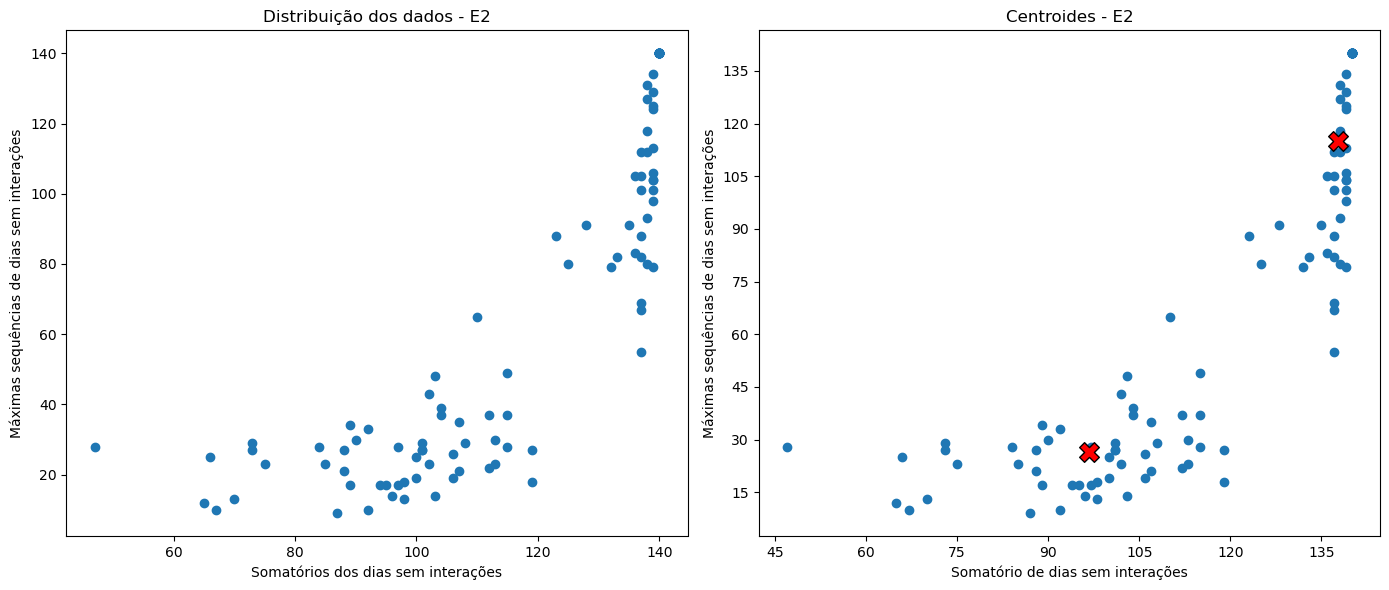

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.scatter(x=df["sum_zeros"], y=df["max_zeros"])
ax1.set_xlabel("Somatórios dos dias sem interações")
ax1.set_ylabel("Máximas sequências de dias sem interações")
ax1.set_title("Distribuição dos dados - E2")

ax2.scatter(x=df["sum_zeros"], y=df["max_zeros"])
ax2.scatter(centroids[:, 0], centroids[:, 1], s=200, c="red", marker="X", edgecolors="black")
ax2.set_xlabel("Somatório de dias sem interações")
ax2.set_ylabel("Máximas sequências de dias sem interações")
ax2.set_title("Centroides - E2")

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig("results/e2_centroids.png")
plt.show()

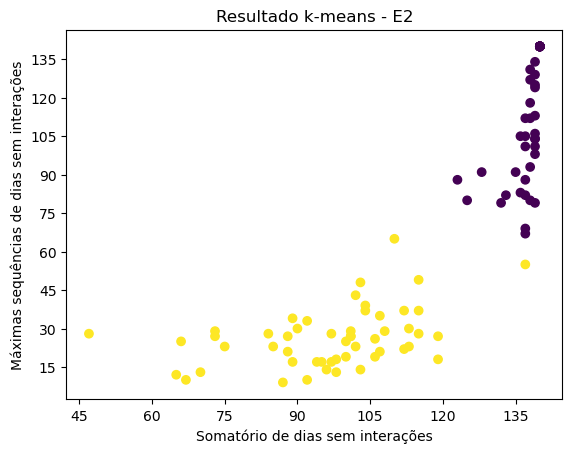

In [27]:
plt.scatter(x=df["sum_zeros"], y=df["max_zeros"], c=df["kmeans"])
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Somatório de dias sem interações")
plt.ylabel("Máximas sequências de dias sem interações")
plt.title("Resultado k-means - E2")
plt.savefig("results/e2_clustering.png")
plt.show()

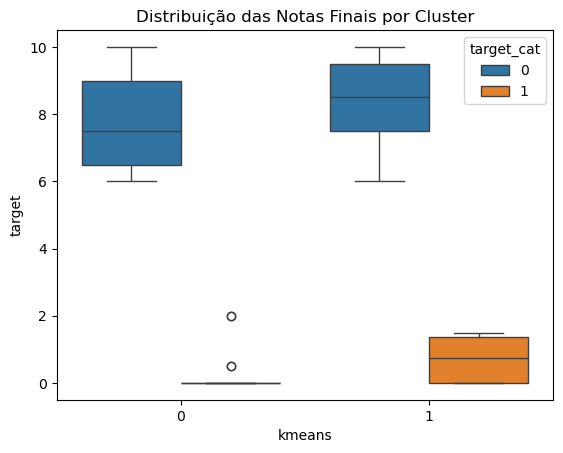

In [28]:
sns.boxplot(x="kmeans", y="target", hue="target_cat", data=df)
plt.title('Distribuição das Notas Finais por Cluster')
plt.show()

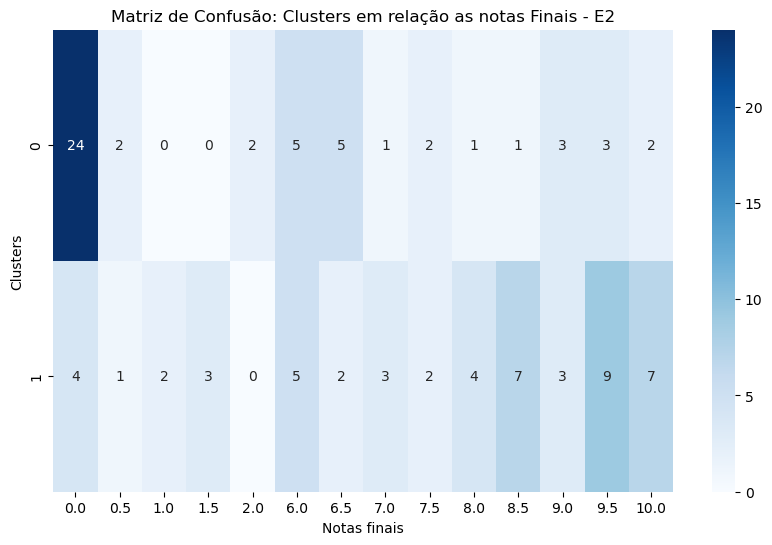

In [29]:
confusion_matrix = pd.crosstab(df['kmeans'], df['target'], rownames=['Clusters'], colnames=['Notas finais'])
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão: Clusters em relação as notas Finais - E2')
plt.savefig("results/e2_mc.png")
plt.show()